In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from IPython.display import HTML
import matplotlib.animation as animation
import scipy.signal as signal

In [ ]:
nx, ny, nvx, nvy = 160, 50, 120, 120
Lx, Ly = 1, 0.5
ngc = 3
step = 20
# with h5py.File(f"data/plasma_past_charged_cylinder/output_{step:04d}.h5", "r") as f:
with h5py.File(f"data/cylinder/output_{step:02d}.h5", "r") as f:
    fi = f["VTKHDF/CellData/fi"][:].reshape(nx, ny, nvx, nvy)
    ni = f["VTKHDF/CellData/ni"][:].reshape(nx, ny)


Nx = np.arange(nx)
Ny = np.arange(ny)
NY, NX = np.meshgrid(Ny, Nx)
negatives = np.argwhere(fi < 0)
dx = Lx / (nx - 2 * ngc)
dy = Ly / (ny - 2 * ngc)
x = np.arange(-ngc * dx, (nx - ngc) * dx, dx)
y = np.arange(-ngc * dy, (ny - ngc) * dy, dy)
Y, X = np.meshgrid(y, x)
surface = (X - 0.375) ** 2 + Y**2 - 0.125**2
# mesh = np.zeros((nx, ny))
# mesh[surface < 0] = np.nan
# mesh[negatives[:, 0], negatives[:, 1]] = 20
# mesh[ni > 0] = 30
ni[surface < 0] = np.nan
ni[ni > 0] = 1
ni[negatives[:, 0], negatives[:, 1]] = -1
ni[-ngc:, :] = np.nan
ni[:, -ngc:] = np.nan
ni[:ngc, :] = np.nan
ni[:, :ngc] = np.nan
plt.figure(figsize=(6, 3))
# plt.pcolormesh(NX, NY, mesh, cmap="jet")
plt.pcolormesh(NX, NY, ni, cmap="jet")
# plt.colorbar()
plt.title(f"Negative distribution at the immersed boundary")

0.0


/tmp/ipykernel_1241055/724569772.py:31: RuntimeWarning: invalid value encountered in divide
  n = ne[ngc:-ngc, ngc:-ngc] / ne[ngc:-ngc, ngc:-ngc].max()


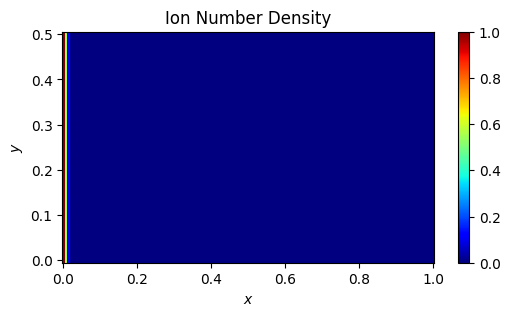

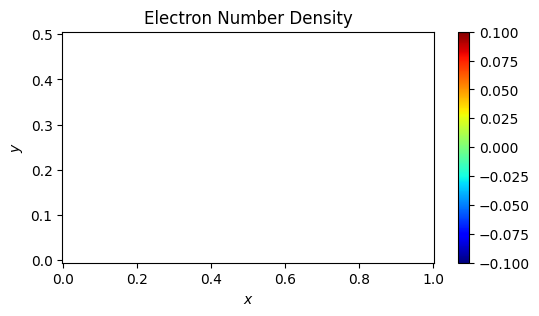

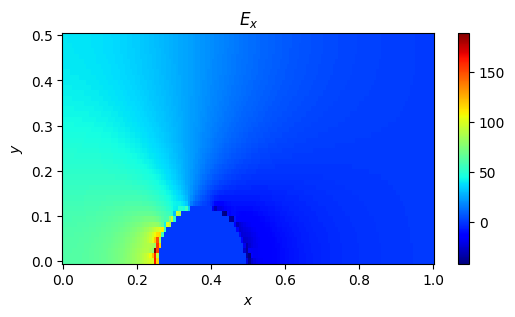

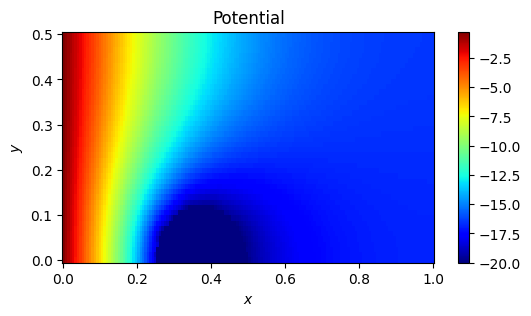

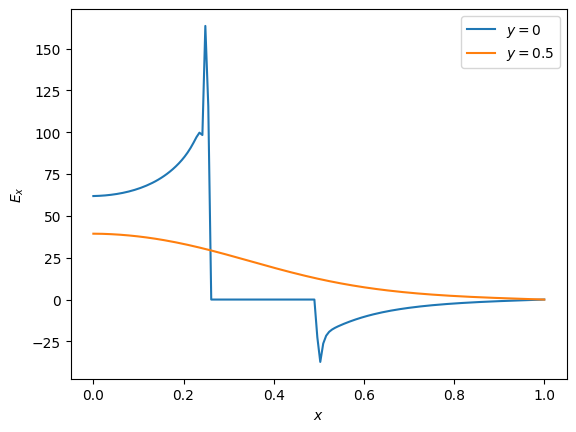

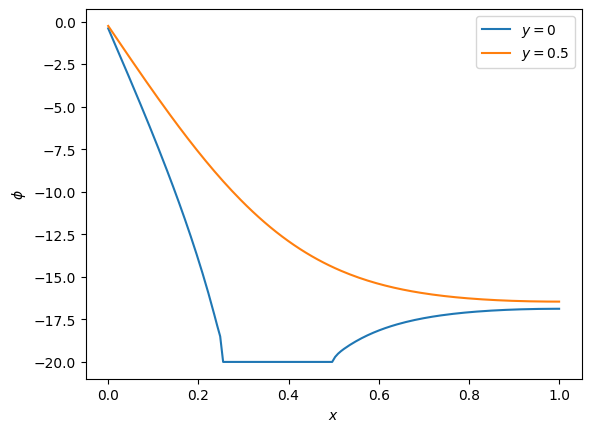

In [ ]:
nx, ny, nvx, nvy = 160, 50, 120, 50
Lx, Ly = 1, 0.5
ngc = 3
step = 20
# with h5py.File(f"data/plasma_past_charged_cylinder/output_{step:04d}.h5", "r") as f:
with h5py.File(f"data/cylinder/output_{step:02d}.h5", "r") as f:
    ne = f["VTKHDF/CellData/ne"][:].reshape(nx, ny)
    ni = f["VTKHDF/CellData/ni"][:].reshape(nx, ny)
    Ex = f["VTKHDF/CellData/Ex"][:].reshape(nx, ny)
    # Ey = f["VTKHDF/CellData/Ey"][:].reshape(nx, ny)
    # rho = f["VTKHDF/CellData/rho"][:].reshape(nx, ny)
    phi = f["VTKHDF/CellData/phi"][:].reshape(nx, ny)

x = np.linspace(0, Lx, nx - 2 * ngc)
y = np.linspace(0, Ly, ny - 2 * ngc)
vx = np.linspace(-10, 10, nvx - 2 * ngc)
vy = np.linspace(-10, 10, nvy - 2 * ngc)
Y, X = np.meshgrid(y, x)

plt.figure(figsize=(6, 3))
n = ni[ngc:-ngc, ngc:-ngc] / ni[ngc:-ngc, ngc:-ngc].max()
n[(X - 0.375) ** 2 + Y**2 <= 0.125**2] = 0.0
print(n.min())
plt.pcolormesh(X, Y, n, cmap="jet")
plt.colorbar()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Ion Number Density")

plt.figure(figsize=(6, 3))
n = ne[ngc:-ngc, ngc:-ngc] / ne[ngc:-ngc, ngc:-ngc].max()
plt.pcolormesh(X, Y, n, cmap="jet")
plt.colorbar()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Electron Number Density")

plt.figure(figsize=(6, 3))
plt.pcolormesh(X, Y, Ex[ngc:-ngc, ngc:-ngc], cmap="jet")
plt.colorbar()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("$E_x$")

plt.figure(figsize=(6, 3))
plt.pcolormesh(X, Y, phi[ngc:-ngc, ngc:-ngc], cmap="jet")
plt.colorbar()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Potential")


plt.figure()
plt.plot(x, Ex[ngc:-ngc, ngc], label="$y=0$")
plt.plot(x, Ex[ngc:-ngc, -ngc - 1], label="$y=0.5$")
plt.xlabel("$x$")
plt.ylabel("$E_x$")
plt.legend()

plt.figure()
plt.plot(x, phi[ngc:-ngc, ngc], label="$y=0$")
plt.plot(x, phi[ngc:-ngc, -ngc], label="$y=0.5$")
plt.xlabel("$x$")
plt.ylabel("$\\phi$")
plt.legend()

In [14]:
# Create animation of the potential field phi
fig, ax = plt.subplots(figsize=(8, 4))
frames = 50  # Number of frames to animate
with h5py.File(f"data/plasma_past_charged_cylinder/output_{0:04d}.h5", "r") as f:
    # ni = f["VTKHDF/CellData/ni"][:].reshape(nx, ny)
    # phi = f["VTKHDF/CellData/phi"][:].reshape(nx, ny)
    Ex = f["VTKHDF/CellData/Ex"][:].reshape(nx, ny)
# n = ni[ngc:-ngc, ngc:-ngc]
# n_max = n.max() if n.max() > 0.0 else 1.0
# im = ax.pcolormesh(X, Y, n / n_max, cmap="jet")
im = ax.pcolormesh(X, Y, Ex[ngc:-ngc, ngc:-ngc], cmap="jet")
colorbar = fig.colorbar(im, ax=ax)


def animate(i):
    ax.clear()
    step = i * 60  # Use every 60th file for animation

    # Load the data for the current frame
    with h5py.File(f"data/plasma_past_charged_cylinder/output_{step:04d}.h5", "r") as f:
        # ni = f["VTKHDF/CellData/ni"][:].reshape(nx, ny)
        # phi = f["VTKHDF/CellData/phi"][:].reshape(nx, ny)
        Ex = f["VTKHDF/CellData/Ex"][:].reshape(nx, ny)

    # Plot the potential field
    # im = ax.pcolormesh(X, Y, phi[ngc:-ngc, ngc:-ngc], cmap="jet")
    # n = ni[ngc:-ngc, ngc:-ngc]
    # n_max = n.max() if n.max() > 0.0 else 1.0
    # im = ax.pcolormesh(X, Y, n / n_max, cmap="jet")
    im = ax.pcolormesh(X, Y, Ex[ngc:-ngc, ngc:-ngc], cmap="jet")
    colorbar.update_normal(im)  # Update colorbar with new data
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    # ax.set_title(f"Ion Number Density (Step {step})")
    # ax.set_title(f"Potential Field (Step {step})")
    ax.set_title(f"Ex Field (Step {step})")

    return [im]


# Create the animation
anim = animation.FuncAnimation(fig, animate, frames=frames, interval=200, blit=False)

anim.save("Ex_field_animation.mp4", writer="ffmpeg", fps=10)
# Display the animation
plt.close()  # Prevent duplicate display
HTML(anim.to_jshtml())
# Uncomment to save the animation

Text(0, 0.5, '$\\sum |E|^2$')

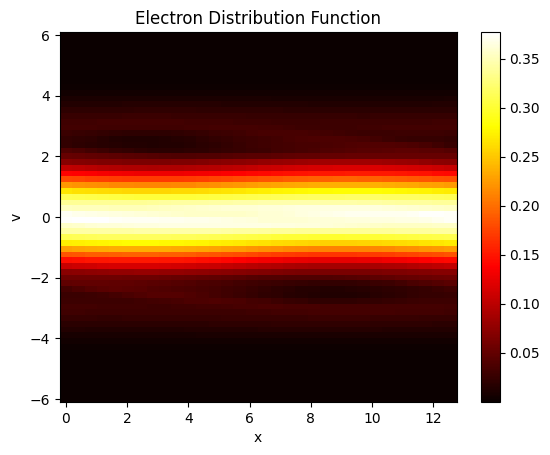

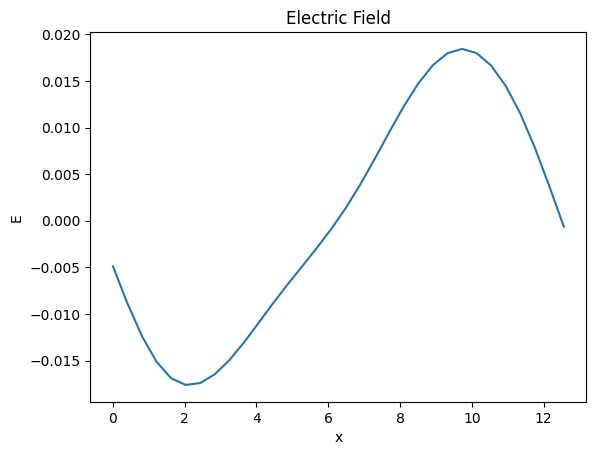

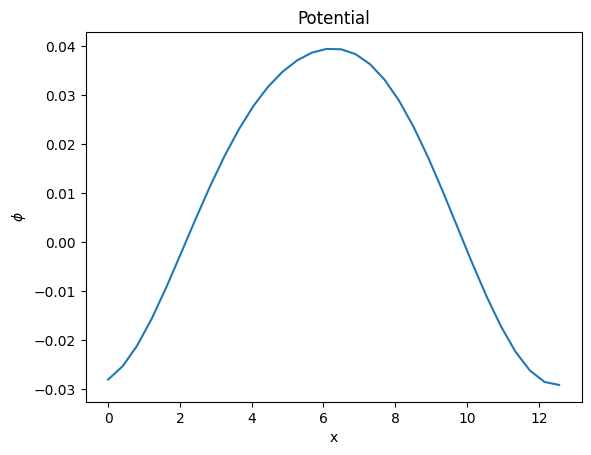

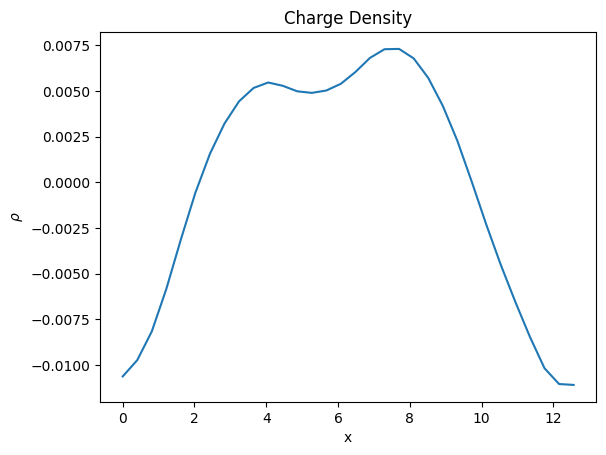

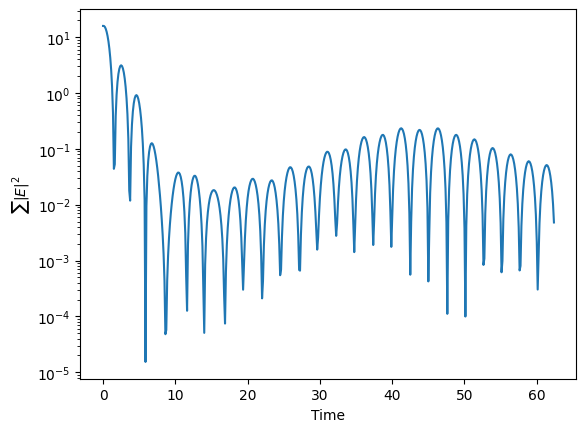

In [47]:
with h5py.File("data/strong_landau.hdf", "r") as f:
    fe = f["VTKHDF/CellData/fe"][:]
    fi = f["VTKHDF/CellData/fi"][:]
    electric_field = f["VTKHDF/CellData/E"][:]
    charge_density = f["VTKHDF/CellData/rho"][:]
    potential_field = f["VTKHDF/CellData/phi"][:]

x = np.linspace(0, 4 * np.pi, fe.shape[1] - 6)
v = np.linspace(-6, 6, fe.shape[2] - 6)
V, X = np.meshgrid(v, x)
ngc = 3  # number of ghost cells

step = -1
plt.figure()
plt.pcolormesh(X, V, fe[step, ngc:-ngc, ngc:-ngc], shading="auto", cmap="hot")
plt.colorbar()
plt.title("Electron Distribution Function")
plt.xlabel("x")
plt.ylabel("v")

plt.figure()
plt.plot(x, electric_field[step, ngc:-ngc])
plt.xlabel("x")
plt.ylabel("E")
plt.title("Electric Field")

plt.figure()
plt.plot(x, potential_field[step, ngc:-ngc])
plt.xlabel("x")
plt.ylabel("$\\phi$")
plt.title("Potential")

plt.figure()
plt.plot(x, charge_density[step, ngc:-ngc])
plt.xlabel("x")
plt.ylabel("$\\rho$")
plt.title("Charge Density")

E_norm = (electric_field[:, ngc:-ngc] ** 2).sum(axis=1)
dt = 1 / 8
t = np.arange(len(E_norm)) * dt
plt.figure()
# plt.plot(t, np.log(E_norm))
plt.semilogy(t, E_norm)
plt.xlabel("Time")
plt.ylabel("$\\sum |E|^2$")

VTKHDF/CellData/phi (61, 61)
VTKHDF/FieldData/X (3721,)
VTKHDF/FieldData/Y (3721,)
VTKHDF/FieldData/iter (1,)


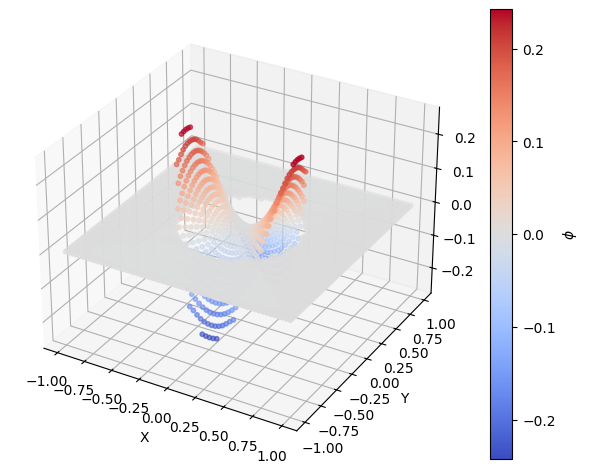

In [14]:
# file = "data/data_example3.hdf"
# file = "data/data_example5.hdf"
file = "data/data_example7.hdf"

with h5py.File(file, "r") as f:
    phi = f["VTKHDF/CellData/phi"][:]
    niter = f["VTKHDF/FieldData/iter"][0]
    X = f["VTKHDF/FieldData/X"][:].reshape(phi.shape)
    Y = f["VTKHDF/FieldData/Y"][:].reshape(phi.shape)
    f.visititems(
        lambda name, obj: (
            print(name, obj.shape) if isinstance(obj, h5py.Dataset) else None
        )
    )
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
scatter = ax.scatter(X, Y, phi, c=phi, cmap="coolwarm", s=10)
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.colorbar(scatter, ax=ax, label="$\\phi$")
plt.tight_layout()

Text(0.5, 1.0, 'data/data_example7.hdf, niter=114')

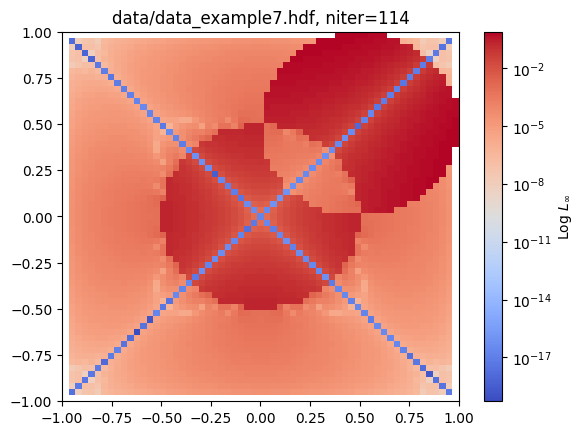

In [15]:
if file == "data/data_example3.hdf":
    u = np.exp(-(X**2) - Y**2)
    u[(X - 0.5) ** 2 + (Y - 0.5) ** 2 > 0.25**2] = 0
if file == "data/data_example5.hdf":
    u = 1 + np.log(2 * np.sqrt(X**2 + Y**2))
    u[X**2 + Y**2 < 0.5**2] = 1
if file == "data/data_example7.hdf":
    u = X**2 - Y**2
    u[(X - 0.5) ** 2 + (Y - 0.5) ** 2 > 0.5**2] = 0

plt.pcolormesh(
    X, Y, np.abs(u - phi), cmap="coolwarm", norm=plt.matplotlib.colors.LogNorm()
)
plt.colorbar(label="Log $L_\\infty$")
plt.title(f"{file}, niter={niter}")

Text(0, 0.5, '$\\phi$')

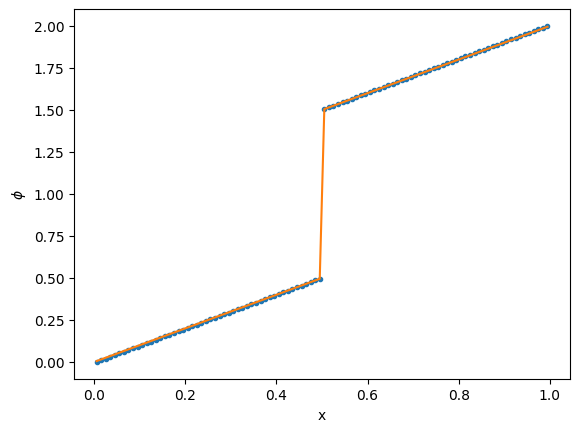

In [21]:
file = "data/data_example1.hdf"
# file = "data/data_example2.hdf"
with h5py.File(file, "r") as f:
    phi = f["VTKHDF/CellData/phi"][:]
    x = f["VTKHDF/FieldData/X"][:].reshape(phi.shape)
    # f.visititems(
    #     lambda name, obj: (
    #         print(name, obj.shape) if isinstance(obj, h5py.Dataset) else None
    #     )
    # )

if file == "data/data_example1.hdf":
    u = np.piecewise(x, [x <= 0.5, x > 0.5], [lambda x: x, lambda x: x + 1])
if file == "data/data_example2.hdf":
    u = np.piecewise(x, [(0.3 <= x) & (x <= 0.6)], [lambda x: np.exp(-(x**2)), 0])
plt.plot(x, phi, ".")
plt.plot(x, u)
plt.xlabel("x")
plt.ylabel("$\\phi$")